# Africa Crisis

Vizualizations taken from https://www.kaggle.com/adikeshri/visualizing-africa


In [1]:
import pandas as pd
data=pd.read_csv('../datasets/african_crises.csv')
data.sample(5)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
249,15,CIV,Ivory Coast,1981,0,2.900000e+02,0,0,0.0,8.682000,1,0,0,no_crisis
98,2,AGO,Angola,1934,0,2.220000e-08,0,0,0.0,3.370787,0,0,0,no_crisis
383,19,EGY,Egypt,1960,0,3.509000e-01,0,0,0.0,0.726129,1,0,0,no_crisis
940,69,ZMB,Zambia,1986,0,1.448000e-02,0,1,0.0,54.800000,1,1,1,no_crisis
307,19,EGY,Egypt,1884,0,2.003000e-01,0,0,0.0,-0.477081,1,0,0,no_crisis


In [2]:
unique_countries=data.country.unique()
unique_countries

array(['Algeria', 'Angola', 'Central African Republic', 'Ivory Coast',
       'Egypt', 'Kenya', 'Mauritius', 'Morocco', 'Nigeria',
       'South Africa', 'Tunisia', 'Zambia', 'Zimbabwe'], dtype=object)

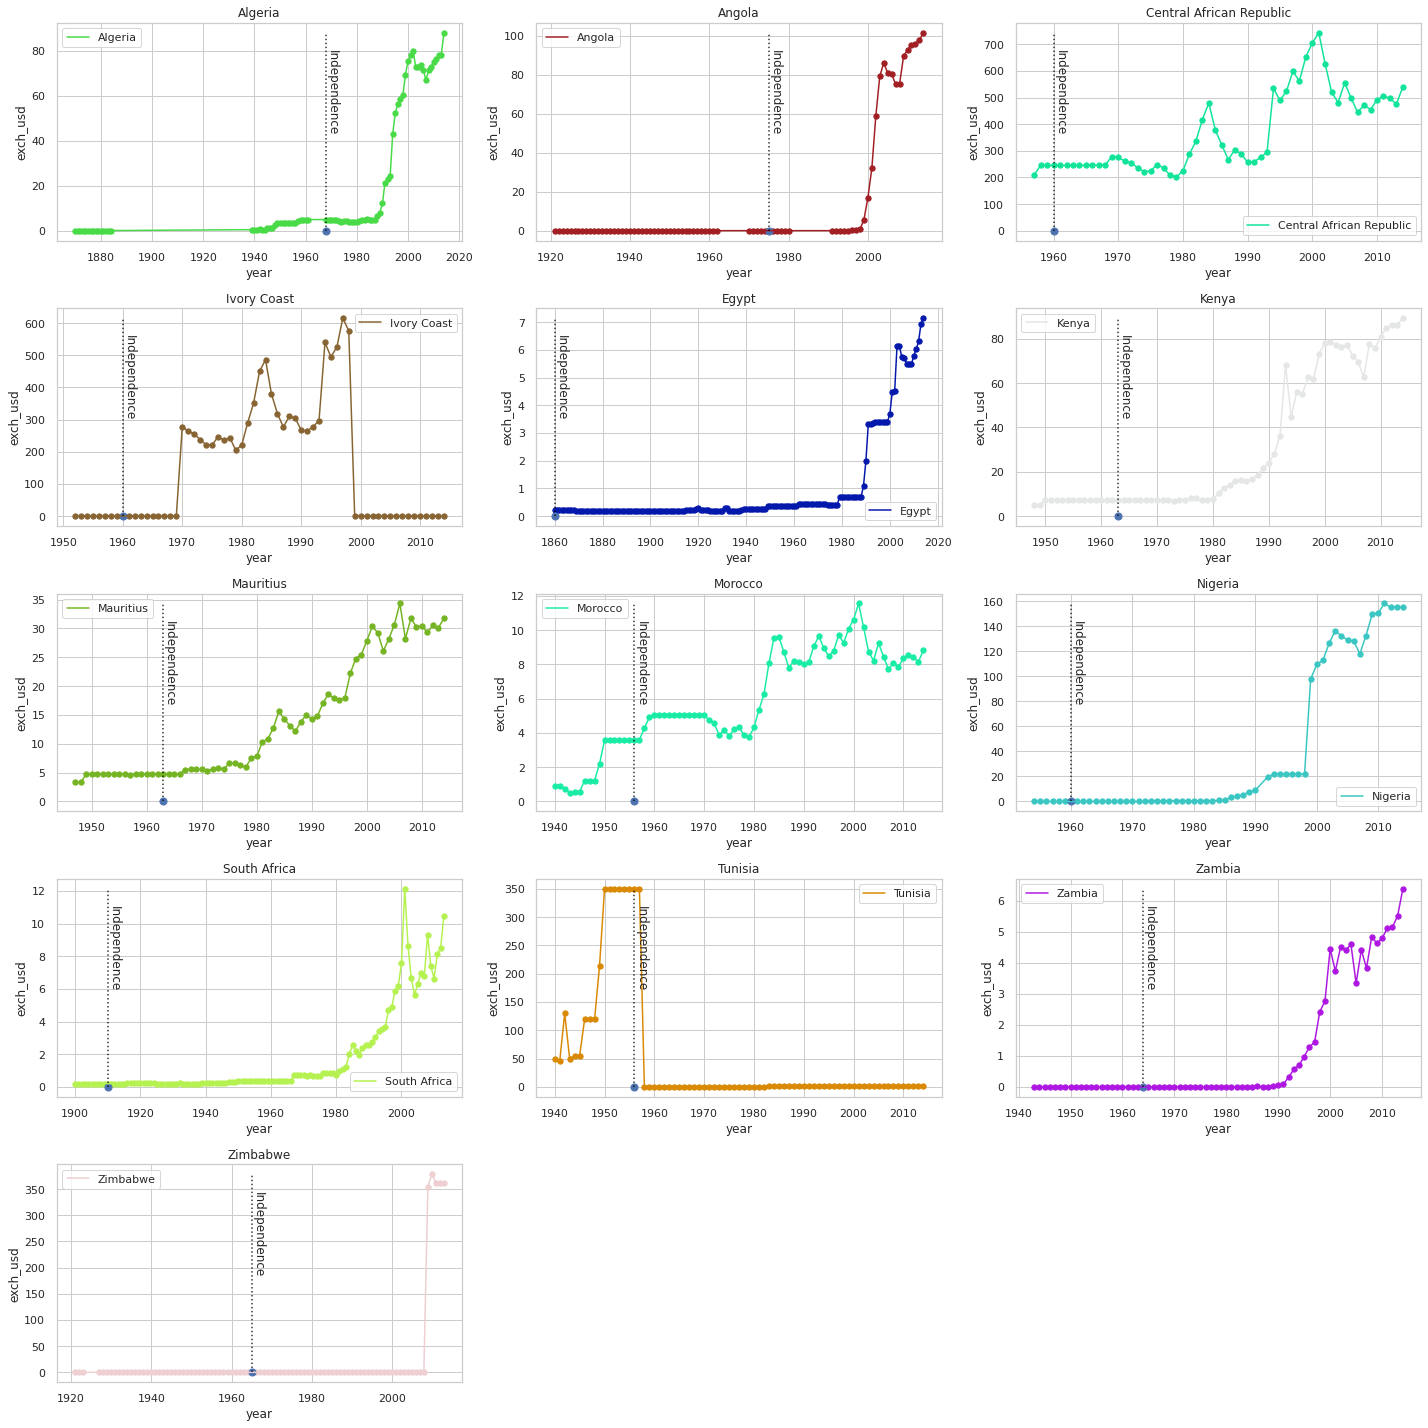

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
sns.set(style='whitegrid')
plt.figure(figsize=(20,20))
count=1
for country in unique_countries:
    plt.subplot(5,3,count)
    count+=1
    col="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    sns.lineplot(data[data.country==country]['year'],
                 data[data.country==country]['exch_usd'],
                 label=country,
                 color=col)
    plt.scatter(data[data.country==country]['year'],
                data[data.country==country]['exch_usd'],
                color=col,
                s=28)
    plt.plot([np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
              np.min(data[np.logical_and(data.country==country,data.independence==1)]['year'])],
             [0,
              np.max(data[data.country==country]['exch_usd'])],
             color='black',
             linestyle='dotted',
             alpha=0.8)
    plt.text(np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
             np.max(data[data.country==country]['exch_usd'])/2,
             'Independence',
             rotation=-90)
    plt.scatter(x=np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
                y=0,
                s=50)
    plt.title(country)
plt.tight_layout()
plt.show()

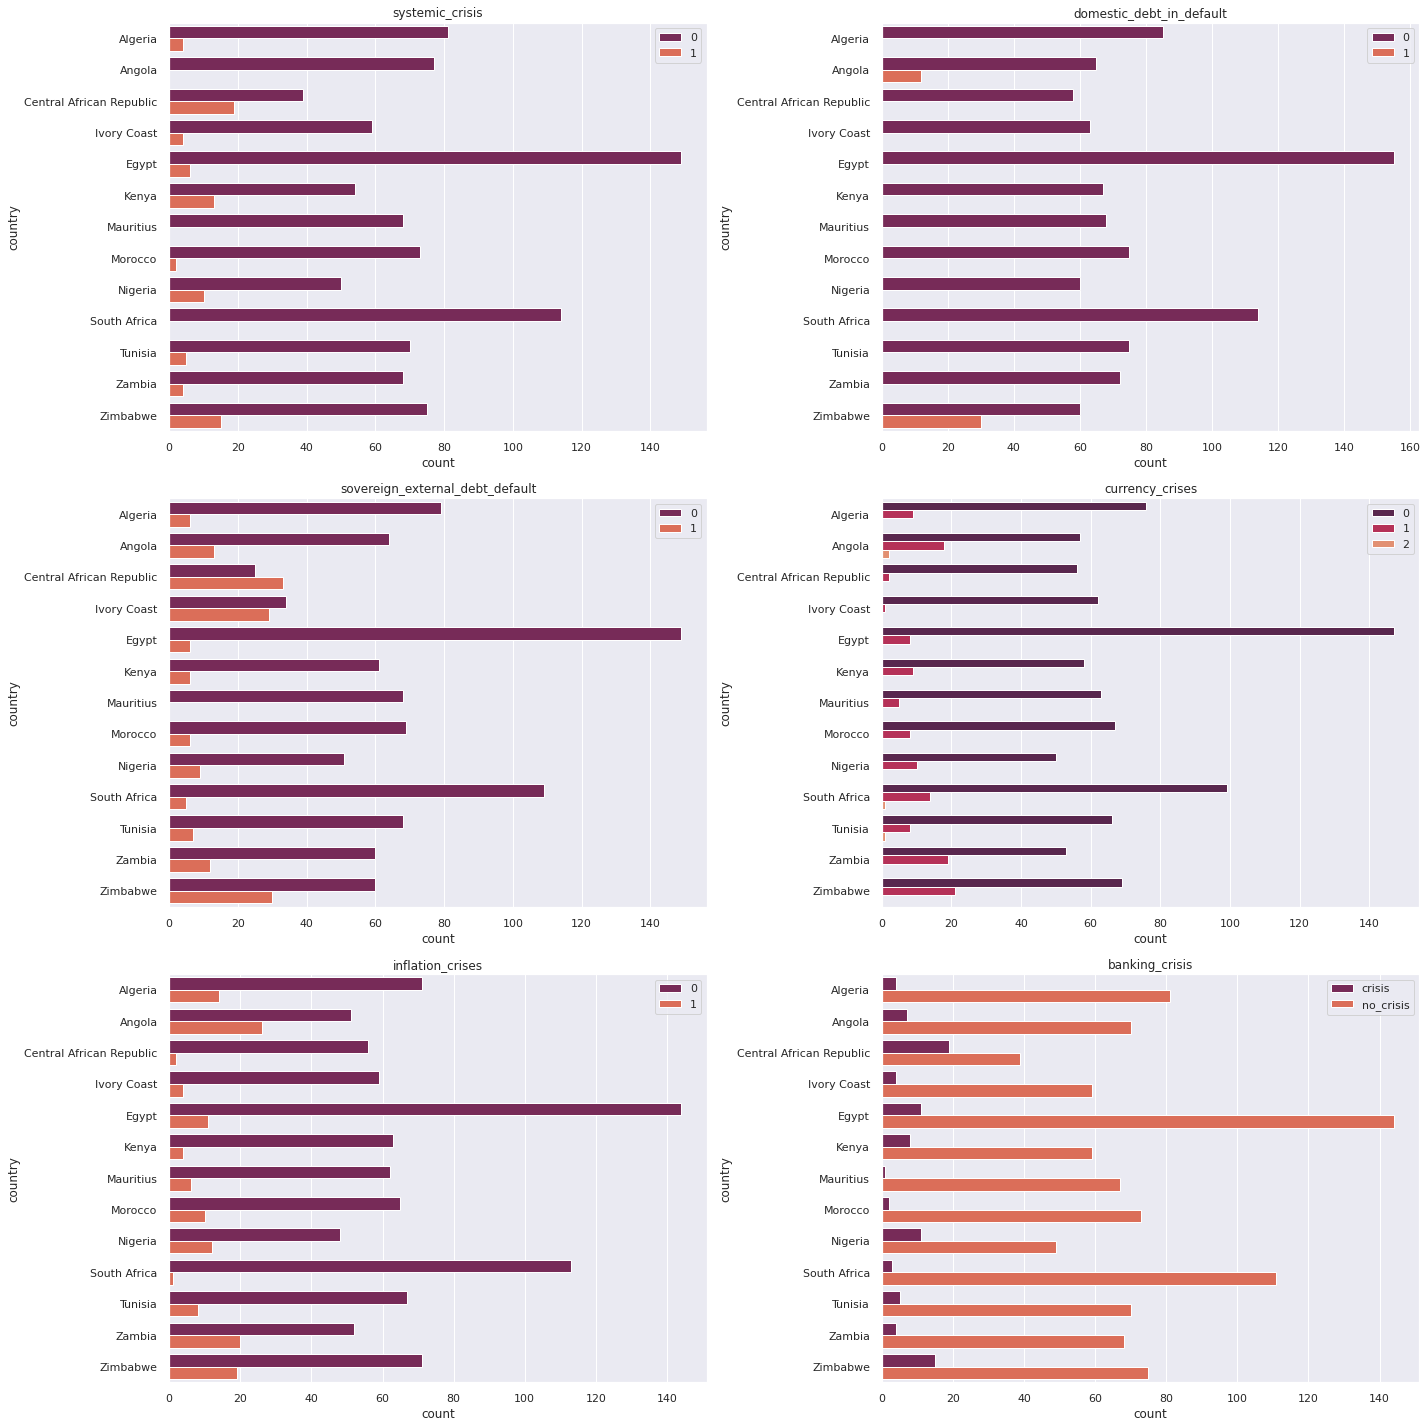

In [4]:
sns.set(style='darkgrid')
cols=['systemic_crisis','domestic_debt_in_default','sovereign_external_debt_default','currency_crises','inflation_crises','banking_crisis']
plt.figure(figsize=(20,20))
count=1
for col in cols:
    plt.subplot(3,2,count)
    count+=1
    sns.countplot(y=data.country,hue=data[col],palette='rocket')
    plt.legend(loc=0)
    plt.title(col)
plt.tight_layout()
plt.show()

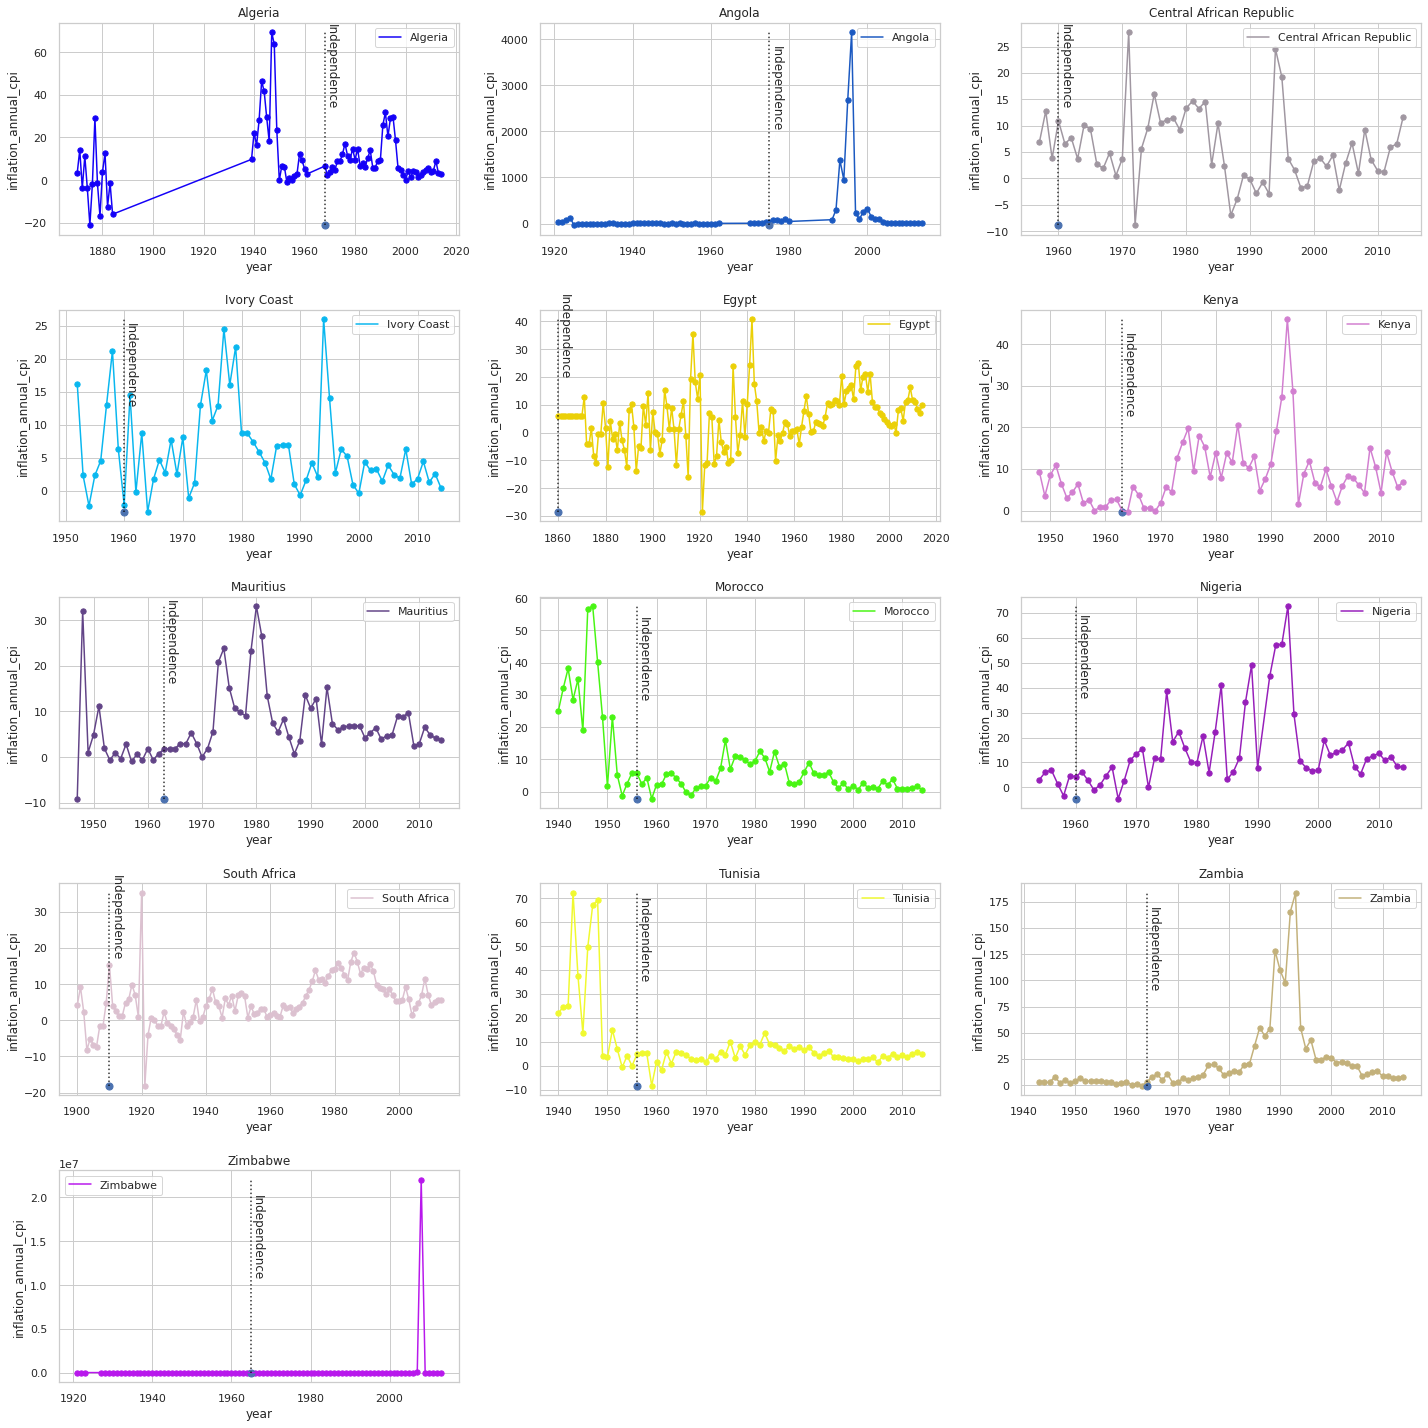

In [5]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,20))
count=1
for country in unique_countries:
    plt.subplot(5,3,count)
    count+=1
    col="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    sns.lineplot(data[data.country==country]['year'],
                 data[data.country==country]['inflation_annual_cpi'],
                 label=country,
                 color=col)
    plt.scatter(data[data.country==country]['year'],
                data[data.country==country]['inflation_annual_cpi'],
                color=col,
                s=28)
    plt.plot([np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
              np.min(data[np.logical_and(data.country==country,data.independence==1)]['year'])],
             [np.min(data[data.country==country]['inflation_annual_cpi']),
              np.max(data[data.country==country]['inflation_annual_cpi'])],
             color='black',
             linestyle='dotted',
             alpha=0.8)
    plt.text(np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
             np.max(data[data.country==country]['inflation_annual_cpi'])/2,
             'Independence',
             rotation=-90)
    plt.scatter(x=np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
                y=np.min(data[data.country==country]['inflation_annual_cpi']),
                s=50)
    plt.title(country)
plt.tight_layout()
plt.show()

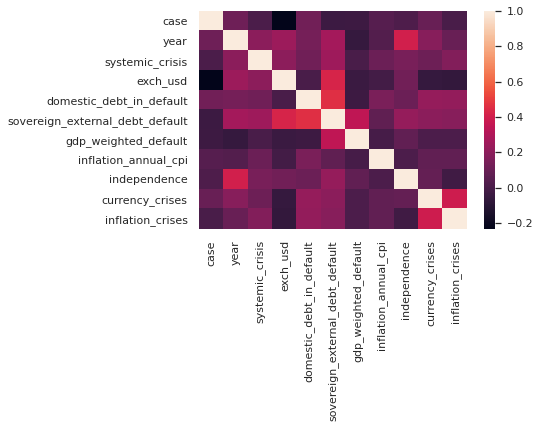

In [6]:
sns.heatmap(data.corr())